# **ML-Driven Solution to the Lateral Pile Capacity for Long Piles in Geotechnical Engineering**

**Rizal Purnawan**\
ORCID: [**0000-0001-8858-4036**](https://orcid.org/0000-0001-8858-4036);
E-mail: rizalpurnawan23@gmail.com

Independent Researcher, Engineer, Mathematician

## **Declaration**

This notebook is part of a research project computational sketch conducted by [Rizal Purnawan](https://www.researchgate.net/profile/Rizal-Purnawan) in the field of computational geotechnical engineering.

## **Abstract**

This notebook is a computational sketch for my on going research in computational geotechnical engineering entitled *ML-Driven Solution to the Lateral Pile Capacity for Long Piles: Theory and Applications*. The research focuses on an innovative method for estimating lateral pile capacity in geotechnical engineering, building upon the theoretical groundwork laid by ([Broms, 1964a](https://doi.org/10.1061/JSFEAQ.0000611) and [Broms, 1964b](https://doi.org/10.1061/JSFEAQ.0000614)) and further generalized by [(Cecconi et. al, 2019)](https://doi.org/10.1016/j.sandf.2019.01.007). Traditionally, estimating the lateral pile capacity of long piles involves solving higher-degree polynomials, a method deemed impractical. In response, we propose a numeric solution by employing a machine learning (ML) model trained on data generated from corresponding polynomial equations to estimate the lateral pile capacity. The theoretical framework of the ML model is presented, along with key performance evaluation parameters. Our results demonstrate that the ML model achieves considerable accuracy, offering a time-effective alternative to the conventional method of solving higher-degree polynomials.

## **1. Introduction**

In geotechnical engineering, a pile foundation is commonly used for a construction which undergoes a huge lateral force or moment, such as a high raise building or an offshore facility. A famous theory for computing the lateral pile capacity is the one developed by ([Broms, 1964a](https://doi.org/10.1061/JSFEAQ.0000611) and [Broms, 1964b](https://doi.org/10.1061/JSFEAQ.0000614)), which was further generalized by [(Cecconi et. al, 2019)](https://doi.org/10.1016/j.sandf.2019.01.007).

The theory developed by Broms were divided in terms of the soil characteristic of being cohesive or cohesionless. It asserts that a dedicated theory is developed for a soil with an internal friction angle $\phi \neq 0$ characterizing the soil being frictional and with $c' = 0$ characterizing the soil being non-cohesive. And another dedicated theory is developed for a soil with $\phi' = 0$ and $c' \neq 0$. [(Cecconi et. al, 2019)](https://doi.org/10.1016/j.sandf.2019.01.007) generalizes the types of the soil into the so-called $c-\phi$ soil, which present the fuzzy parameter of the soil characteristic of being the mixed of both cohessive and non-cohessive in some degree. Hence, in [(Cecconi et. al, 2019)](https://doi.org/10.1016/j.sandf.2019.01.007), we generally have a soil satisfying
\begin{equation}
    \exists a, b \in \mathbb{R}:\;
    a, b \geq 0 \,\land\,
    \phi' = a \,\land\,
    c' = b \,.
\end{equation}

We will refer to [(Cecconi et. al, 2019)](https://doi.org/10.1016/j.sandf.2019.01.007) for the rest of the discussion from this point. In the theory developed by [(Cecconi et. al, 2019)](https://doi.org/10.1016/j.sandf.2019.01.007), there are two types of pile foundation based on its length, namely the short pile and the long pile. The short pile is characterized by the rigid behaviour of the pile in which the failure likely occures in a form of rotation in the pile as a whole. While for the long pile, the failure likely occures in bending. Estimating the short pile using the theory [(Cecconi et. al, 2019)](https://doi.org/10.1016/j.sandf.2019.01.007) is straight forward, but it is not the case for the long piles since one shall solve higher degree polynomial (HDP) equations.
Another classification on the pile is in terms of the pile head treatment, which includes the free head (FH) and the restrained head (RH). For the long pile of both FH and RH we are required to solve HDP equations.

Therefore, we are motivated to develop an accurate approximation for the capacity of long pile based on the theory proposed by [(Cecconi et. al, 2019)](https://doi.org/10.1016/j.sandf.2019.01.007) by employing an ML model without explicitly solving the HDP equation every time.

## **2. Methodology**

In this section, we present the underlying theory proposed by [(Cecconi et. al, 2019)](https://doi.org/10.1016/j.sandf.2019.01.007) regarding the long piles. We will also present the framework for the data structure generated from the the theory by employing probability theory [(Bremaud, 2020)](https://doi.org/10.1007/978-3-030-40183-2).

### **2.1. Long Pile**

A pile considered as a long pile if the maximum moment of the pile is equal to the yielding moment of the pile material. Formally,
\begin{equation}
    M_{\max} = M_y
\end{equation}
applies. This type of pile is characterized with the formation of plastic hinge and the bending failure occurs due to plastic rotation at the hinge [(Cecconi et. al, 2019)](https://doi.org/10.1016/j.sandf.2019.01.007).

The computation in this research will only focus on this type of pile. Another characterization will be in terms of pile head treatment including "free-head" (FH) and "restrained-head" (RH).

### **2.2. FH Long Pile**

For FH long pile, by [(Cecconi et. al, 2019)](https://doi.org/10.1016/j.sandf.2019.01.007), the non-dimensional ultimate lateral capacity is given by a map $\mathcal{H}_{\lim}: (\ell, C) \mapsto \mathcal{H}_{\lim}(\ell, C)$ where $\ell$ is the non-dimensional pile length parameter and $C$ is a non-dimensional parameter regarding the soil cohesion. Note that $\ell, C \in \mathbb{R}$ and $\ell, C \geq 0$ hold. In fact,
\begin{equation}
    \ell := \frac{p}{d} \,,
\end{equation}
where $p$ is the depth of the possible location of plastic hinge and $d$ is the pile diameter, and both satisfy $p, d \in \mathbb{R}$ and $p, d \geq 0$. Therefore $\mathcal{H}_\lim$ is a real-valued function. And it is defined by
\begin{equation}
    \mathcal{H}_\lim(\ell, C)
    := \frac{3}{2} \ell^2 + \frac{9}{2} C \ell \,.
\end{equation}
We can consider $\mathcal{H}_\lim$ being a quadratic polynomial with respect to $\ell$.
On the other hand, the non-dimensional yielding moment parameter is given by a map $\mathcal{M}_y: (\ell, C, \varepsilon) \mapsto \mathcal{M}_y(\ell, C, \varepsilon)$, where $\varepsilon$ is a non-dimensional parameter related to the pile embedement depth into the pile cap, which satisfies $\varepsilon \in \mathbb{R}$ and $\varepsilon \geq 0$. In fact,
\begin{equation}
    \varepsilon := \frac{e}{d} \,,
\end{equation}
where $e$ is the embedment length, which satisfies $e \in \mathbb{R}$ and $e \geq 0$. Similar to $\mathcal{H}_\lim$, $\mathcal{M}_y$ is in fact a real-valued function, which is defined by
\begin{equation}
    \mathcal{M}_y(\ell, C, \varepsilon)
    := \ell^3
    + \frac{3}{2} \left( \varepsilon + \frac{3}{2}C \right) \ell^2
    + \frac{9}{2}C \varepsilon \ell \,.
\end{equation}
The expression above shows that $\mathcal{M}_y$ is a cubic polynomial equation with respect to $\ell$, which is a high degree polynomial.
In practices, the values of $C, \varepsilon$ and $\mathcal{M}_y$ are given. And the aim is to obtain $\mathcal{H}_\lim$. Traditionally, we first need to solve
$\ell$ analytically from the equation of $\mathcal{M}_y$. Then we can obtain $\mathcal{H}_\lim$. However, this approach is impractical and time-consuming.

In exchange, we can solve $\ell$ from the equation of $\mathcal{H}_\lim$, which is a quadratic equation. And the set of solution of $\ell$ is given by
\begin{equation}
    \left\{
    -\frac{9}{6}C + i^{2k} \frac{1}{3} \sqrt{\frac{9^2}{2^2}C^2 + 6 \mathcal{H}_\lim}
    \;\middle|\;
    k \in \{1, 2\}
    \right\}
    = \left\{
    -\frac{3}{2}C + i^{2k} \sqrt{ \frac{9}{4} C^2 + \frac{2}{3} \mathcal{H}_\lim }
    \;\middle|\;
    k \in \{1, 2\}
    \right\} \,.
\end{equation}
In particular, we designate
\begin{equation}
    \ell = -\frac{3}{2}C + \sqrt{ \frac{9}{4} C^2 + \frac{2}{3} \mathcal{H}_\lim } \,.
\end{equation}

### **2.3. RH Long Pile**

For the RH long pile, [(Cecconi et. al, 2019)](https://doi.org/10.1016/j.sandf.2019.01.007) asserts that the non-dimensional yielding moment $\mathcal{M}_y$ is a function of the non-dimensional lateral pile capacity $\mathcal{H}_\lim$ together with the non-dimensional parameter of pile cap thickness $\sigma$ and $C$. Therefore, we have a map $\mathcal{M}_y: (\mathcal{H}_\lim, \sigma, C) \to \mathcal{M}_y(\mathcal{H}_\lim, \sigma, C)$, where $\mathcal{H}_\lim, \sigma, C \in \mathbb{R}$ and $\mathcal{H}_\lim, \sigma, C \geq 0$. And $\mathcal{M}_y$ is defined by
\begin{equation}
    \mathcal{M}_y(\mathcal{H}_\lim, \sigma, C)
    := \frac{1}{2} \left( \frac{2}{3}\mathcal{H}_\lim + \sigma^2 + \frac{9}{4}C^2 + 3 \sigma C \right)^{3/2}
    + \frac{\sigma + \frac{3}{2}C}{2}
    \left( \mathcal{H}_\lim + \sigma^2 + \frac{9}{4}C^2 + 3 \sigma C \right)
    \,.
\end{equation}
If we simplify the expression above such that there are only terms with integer exponents, we will have a quintic polynomial equation for $\mathcal{M}_y$ with respect to $\mathcal{H}_\lim$. It means that in order to obtain $\mathcal{H}_\lim$ we need to solve this quintic equation, while general quintic equations do not have algebraic expressions. This circumstance is definitely impractical.

### **2.4. Numeric Solution**

We will model both cases in a general form incorporating probability theoretic model. Note that there are 5 variables in terms of FH long piles, namely $C, \varepsilon, \ell, \mathcal{M}_y$ and $\mathcal{H}_\lim$. While there are 4 variables in terms of RH long piles, namely $C, \sigma, \mathcal{M}_y$ and $\mathcal{H}_\lim$.

Suppose a probability space $(\Omega, \mathcal{F}, P)$ [(Bremaud, 2020)](https://doi.org/10.1007/978-3-030-40183-2) such that $\Omega$ represents the set of all possible conditions for the soil and the pile. Let $n \in \mathbb{N}$ such that $n + 1$ represents the number of variables in each case. Suppose random variables [(Bremaud, 2020)](https://doi.org/10.1007/978-3-030-40183-2) $X_1, \dotsc, X_n, Y: \Omega \to \mathbb{R}$ such that $X_n$ represents $\mathcal{M}_y$, $Y$ represents $\mathcal{H}_\lim$ and the others represent the rest of variables in each case. It is also designated that $X_1, \dotsc, X_n, Y \in L^2(P)$ [(Salamon, 2016)](https://doi.org/10.4171/159). We postulate that there exists some measurable function [(Salamon, 2016)](https://doi.org/10.4171/159) $F: \mathbb{R} \to \mathbb{R}$ such that
\begin{equation}
    Y = F \circ (X_1, \dotsc, X_n) : \Omega \to \mathbb{R} \,.
\end{equation}
A numeric approximate solution to this problem is given by a random variable $\hat{Y} \in L^2(P)$ such that there exists some measurable function $\hat{F}: \mathbb{R} \to \mathbb{R}$ satisfying
\begin{equation}
    \hat{Y} = \hat{F} \circ (X_1, \dotsc, X_n)
\end{equation}
where $\hat{F}$ is represented by the ML model. The model performance evaluation for the model will use the r-norm [(Purnawan, 2023)](http://dx.doi.org/10.20944/preprints202310.1770.v1). Then, the following requirement shall be satisfied:
***
*There exists some considerable $\rho > 0$ such that the model is $\rho$-reliable [(Purnawan, 2023)](http://dx.doi.org/10.20944/preprints202310.1770.v1), i. e.,*
\begin{equation}
    \| Y - \hat{Y} \|_{2: Y - \mathrm{E}[Y]}^2 < \rho
\end{equation}
*holds.*
***

## **3. Experimentation**

In this section, we will focus on the construction of the data set, the ML model and the computational evaluation on the ML model.

In [ ]:
#@title ### **Modules in use**

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

### **3.1. Generating Data Set**

In this section, we will generate the data set for the ML model. The method follows the framework presented in section 2.4 earlier. The data sets are in forms of data frames. There will be $n$ columns as there are $n$ random variables. In the case of FH long pile, $n = 5$. While $n = 4$ in the case of RH long pile. Thus, there will be two data sets, one of them representing FH long pile while the other representing RH long pile.

For the number of samples, we decide to create each data set with 120K rows to avoid performance setback and time-consumption.

In [ ]:
#@title #### **3.1.1. Data Set FH Long Pile**

def data_FH(
        max_C= 15,
        max_Eps= 32,
        max_Hlim= 1000,
        delta_C= 1,
        delta_Eps= 1,
        delta_Hlim= 0.5
        ):
    # The set of all possible values of C:
    C = [delta_C *k for k in range(int(max_C / delta_C))]

    # The set of all possible values of epsilon:
    Eps = [delta_Eps *k for k in range(int(max_Eps / delta_Eps))]

    # The set of all possible values of Hlim:
    Hlim = [delta_Hlim *k for k in range(int(max_Hlim / delta_Hlim))]

    # Constructing ell and My:
    C_list = list()
    Eps_list = list()
    Hlim_list = list()
    My = list()
    for c in C:
        for eps in Eps:
            for h in Hlim:
                ell = -1.5 *c + np.sqrt((9/4) *c + (2/3) *h)
                my = ell**3 + 1.5 *(eps + 1.5 *c) *ell**2 + 4.5 *c *eps *ell

                C_list.append(c)
                Eps_list.append(eps)
                My.append(my)
                Hlim_list.append(h)

    df = pd.DataFrame(
        {
            "C": C_list,
            "Epsilon": Eps_list,
            "My": My,
            "Hlim": Hlim_list
        }
    )
    return df

# Instantiated data set for FH long pile:
FH_df = data_FH(delta_Hlim= 2).copy()
FH_df.head(15)

,C,Epsilon,My,Hlim
0,0,0,0.000000,0
1,0,0,1.539601,2
2,0,0,4.354648,4
3,0,0,8.000000,6
4,0,0,12.316806,8
5,0,0,17.213259,10
6,0,0,22.627417,12
7,0,0,28.513804,14
8,0,0,34.837187,16
9,0,0,41.569219,18


In [ ]:
#@title #### **3.1.2. Data Set RH Long Pile**

def data_RH(
        max_C= 15,
        max_s= 32,
        max_Hlim= 1000,
        delta_C= 1,
        delta_s= 1,
        delta_Hlim= 0.5
        ):
    # The set of all possible values of C:
    C = [delta_C *k for k in range(int(max_C / delta_C))]

    # The set of all possible values of sigma:
    Sig = [delta_s *k for k in range(int(max_s / delta_s))]

    # The set of all possible values of Hlim:
    Hlim = [delta_Hlim *k for k in range(int(max_Hlim / delta_Hlim))]

    # Constructing My:
    C_list = list()
    Sig_list = list()
    My_list = list()
    Hlim_list = list()
    for c in C:
        for s in Sig:
            for h in Hlim:
                my = 0.5 *((2/3) *h + s**2 + 4.5 *c**2 + 3 *s *c) \
                        + 0.5 *(s + 1.5 *c) *(h + s**2 + 4.5 *c**2 + 3 *s *c)

                C_list.append(c)
                Sig_list.append(s)
                My_list.append(my)
                Hlim_list.append(h)

    df = pd.DataFrame(
        {
            "C": C_list,
            "Sig": Sig_list,
            "My": My_list,
            "Hlim": Hlim_list
        }
    )
    return df

# Instantiated data set for RH long pile:
RH_df = data_RH(delta_Hlim= 2).copy()
RH_df.head(15)

,C,Sig,My,Hlim
0,0,0,0.000000,0
1,0,0,0.666667,2
2,0,0,1.333333,4
3,0,0,2.000000,6
4,0,0,2.666667,8
5,0,0,3.333333,10
6,0,0,4.000000,12
7,0,0,4.666667,14
8,0,0,5.333333,16
9,0,0,6.000000,18


### **3.2. Building ML Model**

In this section, we will build the ML model for each the data set. According to the framework described in section 2.4, the ML model represents the map $\hat{F}: \mathbb{R} \to \mathbb{R}$ with the designation presented in that section. We will use artificial neural networks (ANN) algorithm provided by `tensorflow.keras`.

We will build a systematic algorithm through OOP design using Python `class`. We summarize the construction of the `class` in the following pseudocode:
```
Create: class Predictor
In the class:
    Define instantiations
    Create data preprocessing algorithm
    Create data scaler algorithm
    Create model building algorithm incorporating keras.Sequential()
    Create model training algirhtm
    Create model evaluation algorithm
    Create rho-reliability analysis algorithm
    Create model prediction algorithm
```
The actual algorithm is written as a Python module, and is not included in this notebook. In addition, we have also train the model for the case of FH long pile. The trained model is loaded as follows:

#### **3.2.1. Model of FH Long Pile**

In [ ]:
#@title ##### **Trained Model for FH Long Pile**

path_FHmodel = "/content/drive/MyDrive/Pretrained ANN Model/FH_model_V1.h5"
model_FH = keras.models.load_model(path_FHmodel)

To confirm that the trained model has been trained properly, we observe the result of the evaluation during training as follows:

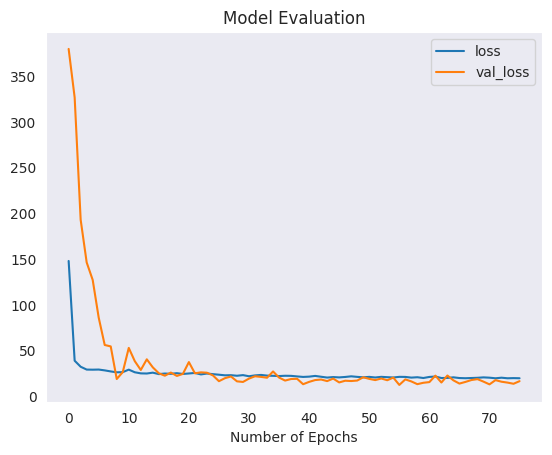

In [ ]:
#@title ##### **Model Evaluation History**

history_FH = pd.read_csv(
    "/content/drive/MyDrive/Pretrained ANN Model/FH_history_V1.csv"
)
history_FH = history_FH.loc[:, ["loss", "val_loss"]]

# Visualizing the Evaluation:
history_FH.plot(title= "Model Evaluation", xlabel= "Number of Epochs");

An additional evaluation is provided regarding the $\rho$-reliability of the model as explained earlier. $\rho$-reliability analysis shows the reliability of the model under some small error representative $\rho$. The algorithm for $\rho$-reliability analysis is contained within the algorithm of managing the model as described earlier. It is created as a Python module and is loaded as follows.

In [ ]:
#@title ##### **rho-Reliability Analysis**

# Importing the algortihm:
from google.colab import files
!cp /content/drive/MyDrive/Python\ Modules/latpile_model_builder.py /content
from latpile_model_builder import Predictor

FHmodel = Predictor(FH_df, "Hlim", train_model= False)
FHmodel.build_model(
    model_and_history_paths= [
        path_FHmodel,
        "/content/drive/MyDrive/Pretrained ANN Model/FH_history_V1.csv"
    ]
)

# We set rho = 0.1:
rho = 0.1
FH_reli_train = FHmodel.rho_reliability(rho= rho, data= 0)
FH_reli_valid = FHmodel.rho_reliability(rho= rho, data= 1)

# Result:
print("UNDER TRAINING DATA")
print("-" *len("UNDER TRAINING DATA"))
if FH_reli_train["reliability"] == True:
    print(f"With training data, the model is {rho}-reliable.")
else:
    print(f"With training data, the model is NOT {rho}-reliable!")
print("As shown below:")
print(FH_reli_train)

print("\nUNDER VALIDATION DATA")
print("-" *len("UNDER VALIDATION DATA"))
if FH_reli_valid["reliability"] == True:
    print(f"With validation data, the model is {rho}-reliable.")
else:
    print(f"With validation data, the model is NOT {rho}-reliable!")
print("As shown below:")
print(FH_reli_valid)

2250/2250 [==============================] - 6s 3ms/step
UNDER TRAINING DATA
-------------------
With training data, the model is 0.1-reliable.
As shown below:
{'r-norm': 0.04657370070387325, 'rho': 0.1, 'reliability': True}

UNDER VALIDATION DATA
---------------------
With validation data, the model is 0.1-reliable.
As shown below:
{'r-norm': 0.0417738918110829, 'rho': 0.1, 'reliability': True}


The $\rho$-reliability analysis shows that the model for the FH long pile is 0.1-reliable, which is a considerably good. For a more intuitive explanation, we present a visualization of the actual data and the predicted data at particular values of $\varepsilon$ and $C$. The visualization is presented as follows.

7500/7500 [==============================] - 18s 2ms/step


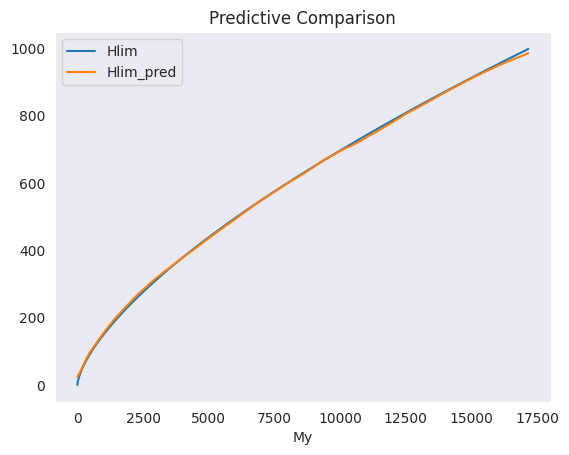

In [ ]:
#@title ##### **Model Comparison for FH Long Pile**

# Comparing the initial data with the predicted value:
def compare_prediction(df, col_pred, model):
    # Preparing the data:
    dat = df.copy()
    X = dat.drop(col_pred, axis= 1)
    y = dat[col_pred]
    scaler = FHmodel.fitted_scaler
    X = pd.DataFrame(scaler.transform(X), columns= X.columns)

    # Making prediction:
    X_tensor = tf.convert_to_tensor(X)
    y_pred = np.array([x[0] for x in model.predict(X)])
    dat["Hlim_pred"] = y_pred
    dat = dat.reset_index().drop(columns= ["index"])

    return dat

def graph_comparison(
        df,
        params= [0, 0],
        slice= [None, None],
        figsize= None,
        title= "Predictive Comparison",
        xlabel= "My",
        colors= ["blue", "salmon"]
        ):
    dat_use = df.copy()
    for p, col in zip(
            params,
            [
                c for c in df.columns
                if not (c in ["My", "Hlim", "Hlim_pred"])
                ]
            ):
        dat_use = dat_use[(dat_use[col] == p)]

    # Setting the graph:
    if all(type(s) == int for s in slice):
        a, b = slice
        dat_fig = dat_use.set_index("My").loc[a: b, ["Hlim", "Hlim_pred"]]
    elif slice[0] is None and type(slice[1]) == int:
        dat_fig = dat_use.set_index("My").loc[:slice[1] , ["Hlim", "Hlim_pred"]]
    elif type(slice[0]) == int and slice[1] is None:
        dat_fig = dat_use.set_index("My").loc[slice[0]: , ["Hlim", "Hlim_pred"]]
    else:
        dat_fig = dat_use.set_index("My").loc[:, ["Hlim", "Hlim_pred"]]
    dat_fig.plot(
        title= title, xlabel= xlabel, figsize= figsize
        );

# FH_compare_df = compare_prediction(FH_df, "Hlim", FHmodel.model)

graph_comparison(
    compare_prediction(FH_df, "Hlim", FHmodel.model),
    params= [0, 0]
)

The graph above shows that the model accurately resembles the actual data.

## **4. Future Work and Conclusion**

Our current model for FH long pile has shown a considerale accuracy. However, we are still confident in improving the model accuracy and overall performance in the on going experiment. Also, the model for RH pile has not been completed yet and is still under development.